In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from scipy.stats import kstest

In [20]:
# example in Pianosi, F., & Wagener, T. (2015). A simple and efficient method for global sensitivity analysis based
# on cumulative distribution functions. Environmental Modelling & Software, 67, 1-11.
def Ishigami_Homma_fun(x1,x2,x3,a=2,b=1): #sin(x1)+a*(sin^2(x2))+b*(x3^4)*sin(x1)
  return np.sin(x1)+a*(np.sin(x2))**2+b*np.power(x3,4)*np.sin(x1)

#scatter plots

Text(0, 0.5, 'y')

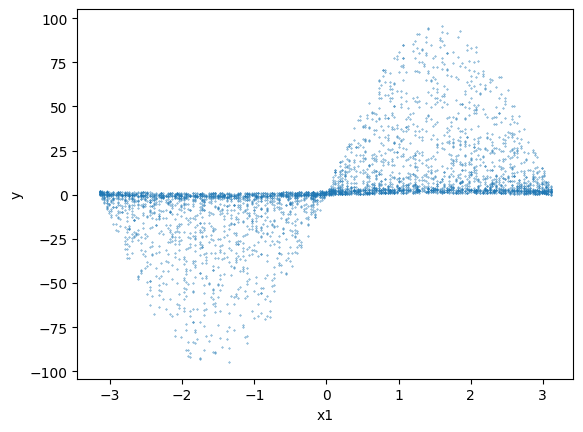

In [ ]:
y=[]
b=[]
for i in range(4000):
  a=np.random.randint(-100, high=100, size=(1,1), dtype=int)
  b.append(a)
  c=np.random.randint(-100, high=100, size=(1,1), dtype=int)
  d=np.random.randint(-100, high=100, size=(1,1), dtype=int)
  y.append(Ishigami_Homma_fun(a*pi/100,c*pi/100,d*pi/100,a=2,b=1))
b=np.array(b)
b=b*pi/100
plt.scatter(b,y,s=0.1)
plt.xlabel("x1")
plt.ylabel("y")

Text(0, 0.5, 'y')

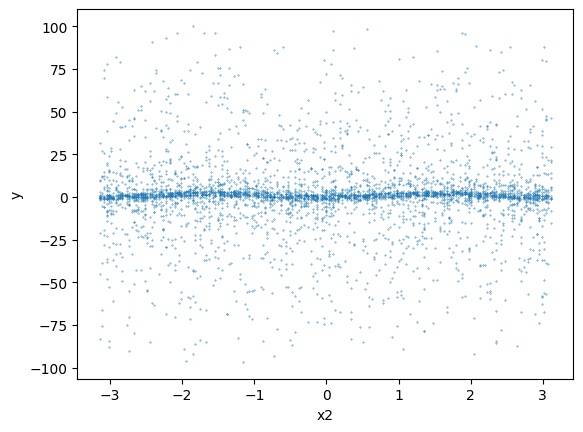

In [ ]:
y=[]
b=[]
for i in range(4000):
  a=np.random.randint(-100, high=100, size=(1,1), dtype=int)
  b.append(a)
  c=np.random.randint(-100, high=100, size=(1,1), dtype=int)
  d=np.random.randint(-100, high=100, size=(1,1), dtype=int)
  y.append(Ishigami_Homma_fun(c*pi/100,a*pi/100,d*pi/100,a=2,b=1))
b=np.array(b)
b=b*pi/100
plt.scatter(b,y,s=0.1)
plt.xlabel("x2")
plt.ylabel("y")

Text(0, 0.5, 'y')

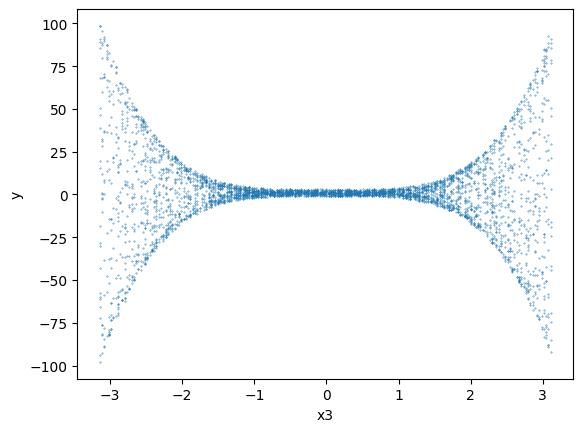

In [ ]:
y=[]
b=[]
for i in range(4000):
  a=np.random.randint(-100, high=100, size=(1,1), dtype=int)
  b.append(a)
  c=np.random.randint(-100, high=100, size=(1,1), dtype=int)
  d=np.random.randint(-100, high=100, size=(1,1), dtype=int)
  y.append(Ishigami_Homma_fun(c*pi/100,d*pi/100,a*pi/100,a=2,b=1))
b=np.array(b)
b=b*pi/100
plt.scatter(b,y,s=0.1)
plt.xlabel("x3")
plt.ylabel("y")

# PAWN

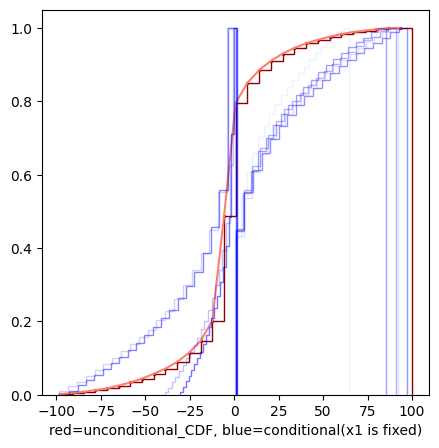

In [21]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.set_xlabel("red=unconditional_CDF, blue=conditional(x1 is fixed)")

# generate y_unconditional CDF by varying all inputs
y_unconditional=[]
for i in range(30000):
  a=np.random.randint(-100, high=100, dtype=int)
  b=np.random.randint(-100, high=100, dtype=int)
  c=np.random.randint(-100, high=100, dtype=int)
  y_unconditional.append(Ishigami_Homma_fun(a*pi/100,b*pi/100,c*pi/100,a=2,b=1))
CDF_un,y_un_value,patches_un=plt.hist(y_unconditional,bins=30,cumulative=True,
         histtype='step',density=True, color='darkred')

# plot y_unconditional CDF
axs.plot(y_un_value[:-1],CDF_un,color="salmon")
axs.scatter(y_un_value[:-1],CDF_un,s=2,color="red")

# generate y_conditional CDF by varying all inputs except x1 (for 10 fix value of x1)
kstest_values1=[]
x1_values=[]
# for 10 fix value of x1
for j in range(10):
  y=[]
  a=np.random.randint(-100, high=100, dtype=int)
  x1_values.append(a*pi/100)
  for i in range(10000):
    b=np.random.randint(-100, high=100, dtype=int)
    c=np.random.randint(-100, high=100, dtype=int)
    y.append(Ishigami_Homma_fun(a*pi/100,b*pi/100,c*pi/100,a=2,b=1))
  CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
         histtype='step',alpha=0.3*j/5, color='b')
  kstest_values1.append(kstest(y_unconditional, y).statistic)

  # axs.plot(y_values[:-1],CDF,alpha=0.2*j/2,color="skyblue")
  # axs.scatter(y_values[:-1],CDF,s=2,alpha=0.1*j/2,)

Text(0, 0.5, 'KS')

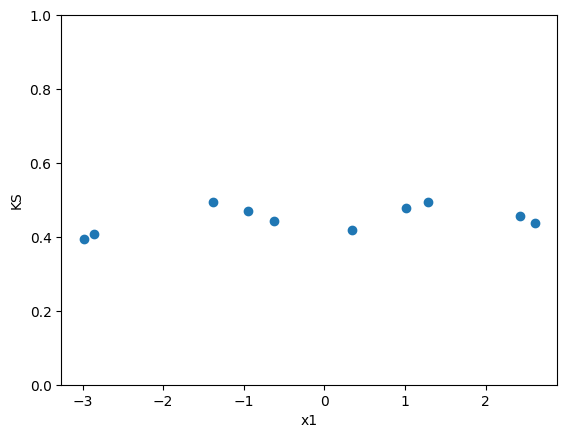

In [4]:
# scatter plot of KS value for 10 conditining value of x1
plt.scatter(x1_values,kstest_values1)
plt.ylim(0,1)
plt.xlabel("x1")
plt.ylabel("KS")

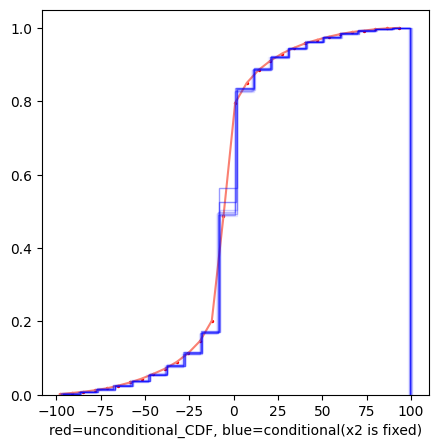

In [22]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.set_xlabel("red=unconditional_CDF, blue=conditional(x2 is fixed)")

# generate y_unconditional CDF by varying all inputs
axs.plot(y_un_value[:-1],CDF_un,color="salmon")
axs.scatter(y_un_value[:-1],CDF_un,s=2,color="red")


# generate y_conditional CDF by varying all inputs except x2 (for 10 fix value of x2)
kstest_values2=[]
x2_values=[]
for j in range(10):
  y=[]
  a=np.random.randint(-100, high=100, dtype=int)
  x2_values.append(a*pi/100)
  for i in range(10000):
    b=np.random.randint(-100, high=100, dtype=int)
    c=np.random.randint(-100, high=100, dtype=int)
    y.append(Ishigami_Homma_fun(b*pi/100,a*pi/100,c*pi/100,a=2,b=1))
  CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
         histtype='step',alpha=0.1*j/2, color='b')
  kstest_values2.append(kstest(y_unconditional, y).statistic)
  # axs.plot(y_values[:-1],CDF,alpha=0.2*j/2,color="skyblue")
  # axs.scatter(y_values[:-1],CDF,s=2,alpha=0.1*j/2,)

Text(0, 0.5, 'KS')

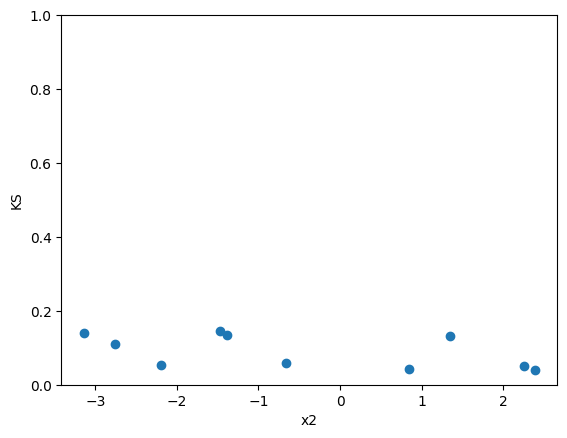

In [23]:
# scatter plot of KS value for 10 conditining value of x2
plt.scatter(x2_values,kstest_values2)
plt.ylim(0,1)
plt.xlabel("x2")
plt.ylabel("KS")

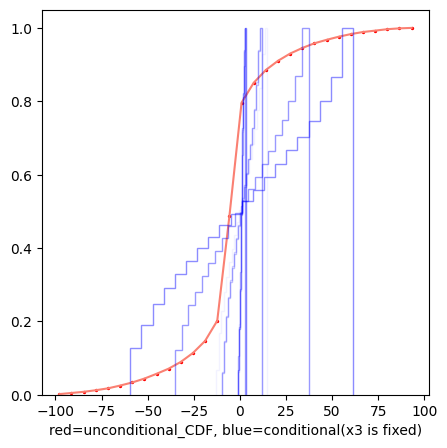

In [25]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.set_xlabel("red=unconditional_CDF, blue=conditional(x3 is fixed)")

# plot y_unconditional CDF
axs.plot(y_un_value[:-1],CDF_un,color="salmon")
axs.scatter(y_un_value[:-1],CDF_un,s=2,color="red")

# generate y_conditional CDF by varying all inputs except x3 (for 10 fix value of x3)
kstest_values3=[]
x3_values=[]
for j in range(10):
  y=[]
  a=np.random.randint(-100, high=100, dtype=int)
  x3_values.append(a*pi/100)
  for i in range(10000):
    b=np.random.randint(-100, high=100, dtype=int)
    c=np.random.randint(-100, high=100, dtype=int)
    y.append(Ishigami_Homma_fun(b*pi/100,c*pi/100,a*pi/100,a=2,b=1))
  CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
         histtype='step',alpha=0.1*j/2, color='b')
  kstest_values3.append(kstest(y_unconditional, y).statistic)
  # axs.plot(y_values[:-1],CDF,alpha=0.2*j/2,color="skyblue")
  # axs.scatter(y_values[:-1],CDF,s=2,alpha=0.1*j/2,)

Text(0, 0.5, 'KS')

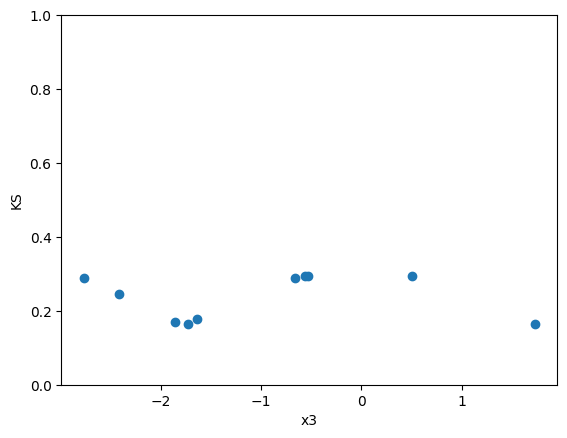

In [26]:
# scatter plot of KS value for 10 conditining value of x3
plt.scatter(x3_values,kstest_values3)
plt.ylim(0,1)
plt.xlabel("x3")
plt.ylabel("KS")

In [27]:
print("PAWN Sensivity indexes")
print(f"median_kstest_values1= {np.median(kstest_values1)}")
print(f"median_kstest_values2= {np.median(kstest_values2)}")
print(f"median_kstest_values3= {np.median(kstest_values3)}")


PAWN Sensivity indexes
median_kstest_values1= 0.4798
median_kstest_values2= 0.08428333333333338
median_kstest_values3= 0.2674666666666667


# sobol

In [17]:
import numpy as np
from scipy.stats import sobol_indices, uniform
def Ishigami_Homma_fun(x,a=2,b=1): #sin(x1)+a*(sin^2(x2))+b*(x3^4)*sin(x1)
  return np.sin(x[0])+a*(np.sin(x[1]))**2+b*np.power(x[2],4)*np.sin(x[0])
indices = sobol_indices(
    func=Ishigami_Homma_fun, n=1024,
    dists=[
        uniform(loc=0, scale=2*np.pi),
        uniform(loc=0, scale=2*np.pi),
        uniform(loc=0, scale=2*np.pi)
    ],
)
np.round(indices.total_order,4)

array([0.9872, 0.    , 0.6316])